Importing

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import scipy as sp
from scipy.integrate import odeint

Creating the function for the ODE

In [28]:
def model(z, t, betaD, betaR, v, n, m, k, M):
    D = z[:k]
    R = z[k:2*k]
    D_n = M@z[:k]
    dDdT = v * (betaD / (1 + R ** n) - D)
    dRdt = betaR * D_n**m / (1 + D_n**m) -R
    return np.ravel([dDdT, dRdt])

Finding the Neighbours for each cell

In [29]:
# def pq2ind(p, q, P):
#     return p + (q-1)*P
# 
# def ind2pq(ind, P):
#     q = 1 + (ind-1)//P
#     p = ind - (q-1)*P
#     return p, q
# 
# def find_neighbours(ind, P, Q):
#     out = []
#     p, q = ind2pq(ind, P)
#     out[0] = pq2ind((p%P)+1, q, P)
#     out[1] = pq2ind(((p-2)%P)+1, q, P)
#     qleft = ((q-2)%Q)+1
#     qright = (q%Q)+1
#     if q/2 != np.round(q/2):
#         pup = p
#         pdown = ((p-2)%P)+1
#     else:
#         pup = (p%P)+1
#         pdown = p
#     out[2] = pq2ind(pup,qleft,P)
#     out[3] = pq2ind(pdown,qleft,P)
#     out[4] = pq2ind(pup,qright,P)
#     out[5] = pq2ind(pdown,qright,P)
#     return out

ChatGPT Translation

In [30]:
def get_connectivity_matrix(P, Q):
    k = P * Q  # number of cells
    M = np.zeros((k, k))  # connectivity matrix
    w = 1 / 6  # weight for interactions

    # calculating the connectivity matrix
    for s in range(1, k + 1):
        kneighbor = find_neighbor_hex(s, P, Q)
        for r in range(6):
            M[s - 1, kneighbor[r] - 1] = w

    return M

def find_neighbor_hex(ind, P, Q):
    # This function finds the 6 neighbors of cell ind
    p, q = ind2pq(ind, P)

    # above and below:
    out = [
        pq2ind((p % P) + 1, q, P),
        pq2ind((p - 2) % P + 1, q, P),
        # left and right sides:
        pq2ind(p if q % 2 != 0 else (p % P) + 1, (q - 2) % Q + 1, P),
        pq2ind((p - 2) % P + 1 if q % 2 != 0 else p, (q - 2) % Q + 1, P),
        pq2ind(p if q % 2 != 0 else (p % P) + 1, q % Q + 1, P),
        pq2ind((p - 2) % P + 1 if q % 2 != 0 else p, q % Q + 1, P)
    ]
    
    return out

def pq2ind(p, q, P):
    return p + (q - 1) * P

def ind2pq(ind, P):
    q = 1 + ((ind - 1) // P)
    p = ind - (q - 1) * P
    return p, q

Setting up the parameters

In [31]:
t = np.linspace(0, 10, 100)
n = 3
m = 3
P = 10
Q = 10
k = P * Q
w = 1/6
betaD = 10
betaR = 10
v = 1
M = get_connectivity_matrix(P, Q)
# M = np.zeros((k, k))
# for s in range(k):
#     k_neighbor = find_neighbours(s, P, Q)
#     for r in range(6):
#         M[s,k_neighbor[r]]=w
M

array([[0.        , 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.16666667],
       [0.16666667, 0.        , 0.16666667, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.16666667, 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.16666667,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.16666667, 0.        ,
        0.16666667],
       [0.16666667, 0.        , 0.        , ..., 0.        , 0.16666667,
        0.        ]])

Initial conditions

In [32]:
D0 = 1e-5 * np.random.random((1, k))
R0 = np.zeros((1, k))
z0 = np.ravel([D0, R0])

Solving the ODE

In [33]:
z = odeint(model, z0, t, args=(n, m, betaD, betaR, v, k, M))
D = z[:, :k]
R = z[:, k:2*k]
z

array([[9.19840260e-06, 5.09462616e-06, 5.94169176e-06, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.90745677e+00, 1.90745527e+00, 1.90745558e+00, ...,
        1.41293729e-01, 1.41293830e-01, 1.41293884e-01],
       [2.60210895e+00, 2.60210841e+00, 2.60210852e+00, ...,
        3.28760510e-01, 3.28760612e-01, 3.28760665e-01],
       ...,
       [6.17692281e-01, 6.16603104e-01, 6.16261112e-01, ...,
        1.14449678e+00, 1.14448477e+00, 1.14488936e+00],
       [6.17792780e-01, 6.16544439e-01, 6.16174549e-01, ...,
        1.14447409e+00, 1.14445832e+00, 1.14491745e+00],
       [6.17907016e-01, 6.16477164e-01, 6.16077454e-01, ...,
        1.14444867e+00, 1.14442842e+00, 1.14494933e+00]])

Plotting

Text(0.5, 0.98, 'Lateral Inhibition Model for a Grid of Cells')

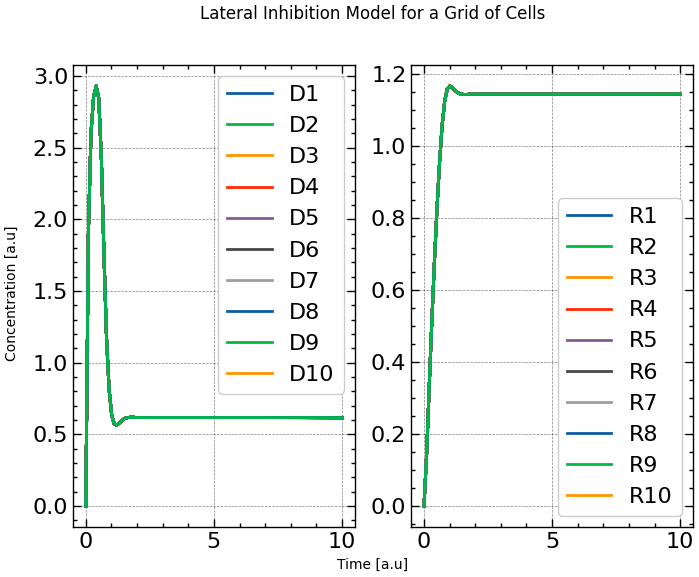

In [34]:
plt.style.use(['science', 'notebook', 'grid'])
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(8, 6))
ax[0].plot(t, D)
ax[0].legend(['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9', 'D10'])
ax[1].plot(t, R)
ax[1].legend(['R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10'])
fig.text(0.5, 0.04, 'Time [a.u]', ha='center')
fig.text(0.04, 0.5, 'Concentration [a.u]', va='center', rotation='vertical')
fig.suptitle('Lateral Inhibition Model for a Grid of Cells')
# plt.show()